In [1]:
# RUN THIS FIRST
# ------------------------------------------------------------------------------
# Big ol' block of import and initialising the colab runtime.
# Don't forget to add a folder called "data", which is where you should
# copy your dataset(s) to.
# ------------------------------------------------------------------------------
# Colab start-bit:
# Install scikit-learn-intelex for accelerated scikit-learn operations
# (optional, mainly for Colab environments)
!pip install scikit-learn-intelex
!pip install six
# ------------------------------------------------------------------------------
import os
import six
import sys
import pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
from __future__ import print_function                                           # Ensure compatibility with Python 2 and 3 print function
data_path = ['data']                                                            # Define the path where the data is stored
# ------------------------------------------------------------------------------
from io import StringIO
from IPython.display import Image, display                                      # For displaying images and other content in IPython
# ------------------------------------------------------------------------------
from sklearn.model_selection import StratifiedShuffleSplit                      # For creating stratified splits of the dataset
from sklearn.model_selection import GridSearchCV                                # For performing grid search with cross-validation

# ------------------------------------------------------------------------------
from sklearn.metrics import mean_squared_error                                  # For computing the mean squared error metric
from sklearn.metrics import accuracy_score, precision_score                     # For computing classification metrics
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
# ------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier                                 # For creating a decision tree classifier model
from sklearn.tree import DecisionTreeRegressor                                  # For creating a decision tree regressor model
from sklearn.tree import export_graphviz                                        # For exporting the decision tree in DOT format
# ------------------------------------------------------------------------------
from sklearn import preprocessing
from sklearnex import patch_sklearn                                             # Patch scikit-learn with Intel(R) Extension for Scikit-learn for improved performance
patch_sklearn()                                                                 # Apply the patch

sys.modules['sklearn.externals.six'] = six
from six import StringIO


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 MB 9.3 MB/s eta 0:00:00


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# Create the full file paths by joining directory and file names
filepath_A = os.sep.join(data_path + ['overtakes_v0_10kSamples_00.csv'])
filepath_B = os.sep.join(data_path + ['overtakes_v1_10kSamples_00.csv'])
filepath_C = os.sep.join(data_path + ['overtakes_v2_10kSamples_00.csv'])
filepath_D = os.sep.join(data_path + ['overtakes_v3_10kSamples_00.csv'])
filepath_E = os.sep.join(data_path + ['overtakes_v4_10kSamples_00.csv'])
# Load the datasets from the specified files
data_A = pd.read_csv(filepath_A, sep=',')
data_B = pd.read_csv(filepath_B, sep=',')
data_C = pd.read_csv(filepath_C, sep=',')
data_D = pd.read_csv(filepath_D, sep=',')
data_E = pd.read_csv(filepath_E, sep=',')

# Display the first few rows of the datasets
print("V0:", data_A.head(), "\n\nV1:", data_B.head(), "\n\nV2:", data_C.head(),
      "\n\nV3:", data_D.head(), "\n\nV4:", data_E.head())

V0:    InitialSeparationM  OvertakingSpeedMPS  OncomingSpeedMPS  Success
0                77.1                36.0               5.0     True
1                60.3                23.9              29.7    False
2                 2.6                29.8               7.9    False
3                44.3                25.3              16.3     True
4                15.8                24.3              13.6     True 

V1:    InitialSeparationM  OvertakingSpeedMPS  OncomingSpeedMPS  Success
0                62.3                35.3               0.6     True
1               174.4                26.7              16.5    False
2               198.1                42.1               5.5     True
3                92.6                41.5               5.0     True
4                89.1                37.9              14.4     True 

V2:    InitialSeparationM  OvertakingSpeedMPS  OncomingSpeedMPS  Success
0               159.8                36.2              17.4     True
1               17

In [4]:
# Display the data types of each column in the DataFrames
print("V0:\n",data_A.dtypes, "\n\nV1:\n",data_B.dtypes, "\n\nV2:\n",
      data_C.dtypes, "\n\nV3:\n",data_D.dtypes, "\n\nV4:\n",data_E.dtypes)

V0:
 InitialSeparationM    float64
OvertakingSpeedMPS    float64
OncomingSpeedMPS      float64
Success                  bool
dtype: object 

V1:
 InitialSeparationM    float64
OvertakingSpeedMPS    float64
OncomingSpeedMPS      float64
Success                  bool
dtype: object 

V2:
 InitialSeparationM    float64
OvertakingSpeedMPS    float64
OncomingSpeedMPS      float64
Success                  bool
dtype: object 

V3:
 InitialSeparationM    float64
OvertakingSpeedMPS    float64
OncomingSpeedMPS      float64
Success                  bool
dtype: object 

V4:
 InitialSeparationM    float64
OvertakingSpeedMPS    float64
OncomingSpeedMPS      float64
Success                  bool
dtype: object


In [5]:
# Convert non-numeric column to numeric
# Convert the 'SUCCESS' column to numeric values: FALSE to 0 and TRUE to 1
data_A['Success'] = data_A.Success.replace('FALSE', 0).replace('TRUE', 1).astype(int)
data_B['Success'] = data_B.Success.replace('FALSE', 0).replace('TRUE', 1).astype(int)
data_C['Success'] = data_C.Success.replace('FALSE', 0).replace('TRUE', 1).astype(int)
data_D['Success'] = data_D.Success.replace('FALSE', 0).replace('TRUE', 1).astype(int)
data_E['Success'] = data_E.Success.replace('FALSE', 0).replace('TRUE', 1).astype(int)

# Display the data types of each column in the DataFrames
print("V0:\n",data_A.dtypes, "\n\nV1:\n",data_B.dtypes, "\n\nV2:\n",
      data_C.dtypes, "\n\nV3:\n",data_D.dtypes, "\n\nV4:\n",data_E.dtypes)

V0:
 InitialSeparationM    float64
OvertakingSpeedMPS    float64
OncomingSpeedMPS      float64
Success                 int64
dtype: object 

V1:
 InitialSeparationM    float64
OvertakingSpeedMPS    float64
OncomingSpeedMPS      float64
Success                 int64
dtype: object 

V2:
 InitialSeparationM    float64
OvertakingSpeedMPS    float64
OncomingSpeedMPS      float64
Success                 int64
dtype: object 

V3:
 InitialSeparationM    float64
OvertakingSpeedMPS    float64
OncomingSpeedMPS      float64
Success                 int64
dtype: object 

V4:
 InitialSeparationM    float64
OvertakingSpeedMPS    float64
OncomingSpeedMPS      float64
Success                 int64
dtype: object


In [6]:
# Display the first few rows of the datasets
print("V0:", data_A.head(), "\n\nV1:", data_B.head(), "\n\nV2:", data_C.head(),
      "\n\nV3:", data_D.head(), "\n\nV4:", data_E.head())

V0:    InitialSeparationM  OvertakingSpeedMPS  OncomingSpeedMPS  Success
0                77.1                36.0               5.0        1
1                60.3                23.9              29.7        0
2                 2.6                29.8               7.9        0
3                44.3                25.3              16.3        1
4                15.8                24.3              13.6        1 

V1:    InitialSeparationM  OvertakingSpeedMPS  OncomingSpeedMPS  Success
0                62.3                35.3               0.6        1
1               174.4                26.7              16.5        0
2               198.1                42.1               5.5        1
3                92.6                41.5               5.0        1
4                89.1                37.9              14.4        1 

V2:    InitialSeparationM  OvertakingSpeedMPS  OncomingSpeedMPS  Success
0               159.8                36.2              17.4        1
1               17

In [7]:
# Define the feature columns (all columns except 'Success')
feature_A_cols = [x for x in data_A.columns if x not in 'Success']
feature_B_cols = [x for x in data_B.columns if x not in 'Success']
feature_C_cols = [x for x in data_C.columns if x not in 'Success']
feature_D_cols = [x for x in data_D.columns if x not in 'Success']
feature_E_cols = [x for x in data_E.columns if x not in 'Success']

# Pointless Output string
print("Beep!")

Beep!


In [8]:
# Initialize StratifiedShuffleSplit object with 1 split, 1000 test size, and a random seed for reproducibility
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)

# Generate train and test indices using the stratified shuffle split object
train_A_idx, test_A_idx = next(strat_shuff_split.split(data_A[feature_A_cols], data_A['Success']))
train_B_idx, test_B_idx = next(strat_shuff_split.split(data_B[feature_B_cols], data_B['Success']))
train_C_idx, test_C_idx = next(strat_shuff_split.split(data_C[feature_C_cols], data_C['Success']))
train_D_idx, test_D_idx = next(strat_shuff_split.split(data_D[feature_D_cols], data_D['Success']))
train_E_idx, test_E_idx = next(strat_shuff_split.split(data_E[feature_E_cols], data_E['Success']))

# Slice the data into training and test sets using the generated indices:
# V0 train/test data
x_A_train = data_A.loc[train_A_idx, feature_A_cols]
y_A_train = data_A.loc[train_A_idx, 'Success']
x_A_test = data_A.loc[test_A_idx, feature_A_cols]
y_A_test = data_A.loc[test_A_idx, 'Success']

# V1 train/test data
x_B_train = data_B.loc[train_B_idx, feature_B_cols]
y_B_train = data_B.loc[train_B_idx, 'Success']
x_B_test  = data_B.loc[test_B_idx, feature_B_cols]
y_B_test  = data_B.loc[test_B_idx, 'Success']

# V2 train/test data
x_C_train = data_C.loc[train_C_idx, feature_C_cols]
y_C_train = data_C.loc[train_C_idx, 'Success']
x_C_test  = data_C.loc[test_C_idx, feature_C_cols]
y_C_test  = data_C.loc[test_C_idx, 'Success']

# V3 train/test data
x_D_train = data_D.loc[train_D_idx, feature_D_cols]
y_D_train = data_D.loc[train_D_idx, 'Success']
x_D_test  = data_D.loc[test_D_idx, feature_D_cols]
y_D_test  = data_D.loc[test_D_idx, 'Success']

# V4 train/test data
x_E_train = data_E.loc[train_E_idx, feature_E_cols]
y_E_train = data_E.loc[train_E_idx, 'Success']
x_E_test  = data_E.loc[test_E_idx, feature_E_cols]
y_E_test  = data_E.loc[test_E_idx, 'Success']

# Pointless Output string
print("Boop!")

Boop!


In [9]:
# Display the distribution of 'Success' in the Training sets
print("V0:", y_A_train.value_counts().sort_index(),
      "\n\nV1:", y_B_train.value_counts().sort_index(),
      "\n\nV2:", y_C_train.value_counts().sort_index(),
      "\n\nV3:", y_D_train.value_counts().sort_index(),
      "\n\nV4:", y_E_train.value_counts().sort_index())

V0: Success
0    4461
1    4539
Name: count, dtype: int64 

V1: Success
0    4784
1    4216
Name: count, dtype: int64 

V2: Success
0    4099
1    4901
Name: count, dtype: int64 

V3: Success
0    3656
1    5344
Name: count, dtype: int64 

V4: Success
0    2739
1    6261
Name: count, dtype: int64


In [10]:
# Check size of training datasets
print("Number of values in training datasets:",
      "\nV0: ", train_A_idx.size,
      "\nV1: ", train_B_idx.size,
      "\nV2: ", train_C_idx.size,
      "\nV3: ", train_D_idx.size,
      "\nV4: ", train_E_idx.size)

Number of values in training datasets: 
V0:  9000 
V1:  9000 
V2:  9000 
V3:  9000 
V4:  9000


In [11]:
# Check size of testing datasets
print("Number of values in testing dataset:",
      "\nV0: ", test_A_idx.size,
      "\nV1: ", test_B_idx.size,
      "\nV2: ", test_C_idx.size,
      "\nV3: ", test_D_idx.size,
      "\nV4: ", test_E_idx.size)

Number of values in testing dataset: 
V0:  1000 
V1:  1000 
V2:  1000 
V3:  1000 
V4:  1000


In [12]:
# Display the distribution of 'Success' in the Test sets
print("V0:", y_A_test.value_counts().sort_index(),
      "\n\nV1:", y_B_test.value_counts().sort_index(),
      "\n\nV2:", y_C_test.value_counts().sort_index(),
      "\n\nV3:", y_D_test.value_counts().sort_index(),
      "\n\nV4:", y_E_test.value_counts().sort_index())

V0: Success
0    496
1    504
Name: count, dtype: int64 

V1: Success
0    532
1    468
Name: count, dtype: int64 

V2: Success
0    455
1    545
Name: count, dtype: int64 

V3: Success
0    406
1    594
Name: count, dtype: int64 

V4: Success
0    304
1    696
Name: count, dtype: int64


In [13]:
# Display the normalized distribution of 'Success' in the Test sets
print("V0: ", y_A_train.value_counts(normalize=True).sort_index(),
      "\n\nV1: ", y_B_train.value_counts(normalize=True).sort_index(),
      "\n\nV2: ", y_C_train.value_counts(normalize=True).sort_index(),
      "\n\nV3: ", y_D_train.value_counts(normalize=True).sort_index(),
      "\n\nV4: ", y_E_train.value_counts(normalize=True).sort_index())

V0:  Success
0    0.495667
1    0.504333
Name: proportion, dtype: float64 

V1:  Success
0    0.531556
1    0.468444
Name: proportion, dtype: float64 

V2:  Success
0    0.455444
1    0.544556
Name: proportion, dtype: float64 

V3:  Success
0    0.406222
1    0.593778
Name: proportion, dtype: float64 

V4:  Success
0    0.304333
1    0.695667
Name: proportion, dtype: float64


In [14]:
# Initialize and train a group of DecisionTreeClassifiers
# ------------------------------------------------------------------------------
# V0
dt_A = DecisionTreeClassifier(random_state=42)
dt_A = dt_A.fit(x_A_train, y_A_train)
# ------------------------------------------------------------------------------
# V1
dt_B = DecisionTreeClassifier(random_state=42)
dt_B = dt_B.fit(x_B_train, y_B_train)
# ------------------------------------------------------------------------------
# V2
dt_C = DecisionTreeClassifier(random_state=42)
dt_C = dt_C.fit(x_C_train, y_C_train)
# ------------------------------------------------------------------------------
# V3
dt_D = DecisionTreeClassifier(random_state=42)
dt_D = dt_D.fit(x_D_train, y_D_train)
# ------------------------------------------------------------------------------
# V4
dt_E = DecisionTreeClassifier(random_state=42)
dt_E = dt_E.fit(x_E_train, y_E_train)

In [15]:
# Display the number of nodes and the maximum depth of the trained tree
print("\nV0 Tree: ", dt_A.tree_.node_count, dt_A.tree_.max_depth,
      "\nV1 Tree: ", dt_B.tree_.node_count, dt_B.tree_.max_depth,
      "\nV2 Tree: ", dt_C.tree_.node_count, dt_C.tree_.max_depth,
      "\nV3 Tree: ", dt_D.tree_.node_count, dt_D.tree_.max_depth,
      "\nV4 Tree: ", dt_E.tree_.node_count, dt_E.tree_.max_depth)


V0 Tree:  6215 51 
V1 Tree:  1291 25 
V2 Tree:  3991 38 
V3 Tree:  3367 38 
V4 Tree:  4989 41


In [16]:
# Define a function to calculate and return error metrics
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [17]:
# Format Testing Block
'''
# Predict on training and test sets
y_A_train_pred = dt_A.predict(x_A_train)
y_A_test_pred  = dt_A.predict(x_A_test)

# Calculate error metrics for both sets and concatenate the results
train_test_full_error_A = pd.concat([measure_error(y_A_train, y_A_train_pred, 'train'),
                                   measure_error(y_A_test, y_A_test_pred, 'test')],
                                   axis=1)

# Display the error metrics
print("V0:\t    Error Metrics")
print(train_test_full_error_A)
'''

# Pointless Output string
print("Bleop!")

Bleop!


In [18]:
# Predict on training and test sets
# ------------------------------------------------------------------------------
# V0:
y_A_train_pred = dt_A.predict(x_A_train)
y_A_test_pred  = dt_A.predict(x_A_test)
# ------------------------------------------------------------------------------
# V1:
y_B_train_pred = dt_B.predict(x_B_train)
y_B_test_pred  = dt_B.predict(x_B_test)
# ------------------------------------------------------------------------------
# V2:
y_C_train_pred = dt_C.predict(x_C_train)
y_C_test_pred  = dt_C.predict(x_C_test)
# ------------------------------------------------------------------------------
# V3:
y_D_train_pred = dt_D.predict(x_D_train)
y_D_test_pred  = dt_D.predict(x_D_test)
# ------------------------------------------------------------------------------
# V4:
y_E_train_pred = dt_E.predict(x_E_train)
y_E_test_pred  = dt_E.predict(x_E_test)
# ------------------------------------------------------------------------------
# Calculate error metrics for both sets and concatenate the results
# ------------------------------------------------------------------------------
# V0:
train_test_full_error_A = pd.concat([measure_error(y_A_train, y_A_train_pred, 'train'),
                                     measure_error(y_A_test,  y_A_test_pred, 'test')],
                                     axis=1)
# ------------------------------------------------------------------------------
# V1:
train_test_full_error_B = pd.concat([measure_error(y_B_train, y_B_train_pred, 'train'),
                                     measure_error(y_B_test,  y_B_test_pred, 'test')],
                                     axis=1)
# ------------------------------------------------------------------------------
# V2:
train_test_full_error_C = pd.concat([measure_error(y_C_train, y_C_train_pred, 'train'),
                                     measure_error(y_C_test,  y_C_test_pred, 'test')],
                                     axis=1)
# ------------------------------------------------------------------------------
# V3:
train_test_full_error_D = pd.concat([measure_error(y_D_train, y_D_train_pred, 'train'),
                                     measure_error(y_D_test,  y_D_test_pred, 'test')],
                                     axis=1)
# ------------------------------------------------------------------------------
# V4:
train_test_full_error_E = pd.concat([measure_error(y_E_train, y_E_train_pred, 'train'),
                                     measure_error(y_E_test,  y_E_test_pred, 'test')],
                                     axis=1)
# ------------------------------------------------------------------------------
# Display the error metrics
print("V0:\t    Error Metrics")
print(train_test_full_error_A)
print("\nV1:\t    Error Metrics")
print(train_test_full_error_B)
print("\nV2:\t    Error Metrics")
print(train_test_full_error_C)
print("\nV3:\t    Error Metrics")
print(train_test_full_error_D)
print("\nV4:\t    Error Metrics")
print(train_test_full_error_E)

V0:	    Error Metrics
           train      test
accuracy     1.0  0.541000
precision    1.0  0.545825
recall       1.0  0.531746
f1           1.0  0.538693

V1:	    Error Metrics
           train      test
accuracy     1.0  0.884000
precision    1.0  0.879310
recall       1.0  0.871795
f1           1.0  0.875536

V2:	    Error Metrics
           train      test
accuracy     1.0  0.736000
precision    1.0  0.757798
recall       1.0  0.757798
f1           1.0  0.757798

V3:	    Error Metrics
           train      test
accuracy     1.0  0.787000
precision    1.0  0.825641
recall       1.0  0.813131
f1           1.0  0.819338

V4:	    Error Metrics
           train      test
accuracy     1.0  0.654000
precision    1.0  0.760417
recall       1.0  0.734195
f1           1.0  0.747076


In [19]:
# Define a parameter grid for GridSearchCV
# ------------------------------------------------------------------------------
# V0:
param_grid_A = { 'max_depth' : range(1, dt_A.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt_A.feature_importances_)+1)}
# ------------------------------------------------------------------------------
# V1:
param_grid_B = { 'max_depth' : range(1, dt_B.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt_B.feature_importances_)+1)}
# ------------------------------------------------------------------------------
# V2:
param_grid_C = { 'max_depth' : range(1, dt_C.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt_C.feature_importances_)+1)}
# ------------------------------------------------------------------------------
# V3:
param_grid_D = { 'max_depth' : range(1, dt_D.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt_D.feature_importances_)+1)}
# ------------------------------------------------------------------------------
# V4:
param_grid_E = { 'max_depth' : range(1, dt_E.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt_E.feature_importances_)+1)}
# ------------------------------------------------------------------------------
# Initialize and fit a GridSearchCV with a DecisionTreeClassifier
# ------------------------------------------------------------------------------
# V0:
GR_A = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid = param_grid_A,
                  scoring= 'accuracy',
                  n_jobs= -1)
GR_A = GR_A.fit(x_A_train, y_A_train)
# ------------------------------------------------------------------------------
# V1:
GR_B = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid = param_grid_B,
                  scoring= 'accuracy',
                  n_jobs= -1)
GR_B = GR_B.fit(x_B_train, y_B_train)
# ------------------------------------------------------------------------------
# V2:
GR_C = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid = param_grid_C,
                  scoring= 'accuracy',
                  n_jobs= -1)
GR_C = GR_C.fit(x_C_train, y_C_train)
# ------------------------------------------------------------------------------
# V3:
GR_D = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid = param_grid_D,
                  scoring= 'accuracy',
                  n_jobs= -1)
GR_D = GR_D.fit(x_D_train, y_D_train)
# ------------------------------------------------------------------------------
# V4:
GR_E = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid = param_grid_E,
                  scoring= 'accuracy',
                  n_jobs= -1)
GR_E = GR_E.fit(x_E_train, y_E_train)
# ------------------------------------------------------------------------------
# Pointless Output string
print("Beep Boop!")

Beep Boop!


In [22]:
# Display node count and max depth of best estimator
print("V0 Best Estimators:", GR_A.best_estimator_.tree_.node_count, GR_A.best_estimator_.tree_.max_depth,
      "\nV1 Best Estimators:", GR_B.best_estimator_.tree_.node_count, GR_B.best_estimator_.tree_.max_depth,
      "\nV2 Best Estimators:", GR_C.best_estimator_.tree_.node_count, GR_C.best_estimator_.tree_.max_depth,
      "\nV3 Best Estimators:", GR_D.best_estimator_.tree_.node_count, GR_D.best_estimator_.tree_.max_depth,
      "\nV4 Best Estimators:", GR_E.best_estimator_.tree_.node_count, GR_E.best_estimator_.tree_.max_depth)

V0 Best Estimators: 1733 15 
V1 Best Estimators: 55 5 
V2 Best Estimators: 63 5 
V3 Best Estimators: 3 1 
V4 Best Estimators: 3 1


In [20]:
# Predict on training and test sets using the best estimator from GridSearchCV
# ------------------------------------------------------------------------------
# V0:
y_A_train_pred_gr = GR_A.predict(x_A_train)
y_A_test_pred_gr  = GR_A.predict(x_A_test)
# ------------------------------------------------------------------------------
# V1:
y_B_train_pred_gr = GR_B.predict(x_B_train)
y_B_test_pred_gr  = GR_B.predict(x_B_test)
# ------------------------------------------------------------------------------
# V2:
y_C_train_pred_gr = GR_C.predict(x_C_train)
y_C_test_pred_gr  = GR_C.predict(x_C_test)
# ------------------------------------------------------------------------------
# V3:
y_D_train_pred_gr = GR_D.predict(x_D_train)
y_D_test_pred_gr  = GR_D.predict(x_D_test)
# ------------------------------------------------------------------------------
# V4:
y_E_train_pred_gr = GR_E.predict(x_E_train)
y_E_test_pred_gr  = GR_E.predict(x_E_test)
# ------------------------------------------------------------------------------
# Calculate and display error metrics for both sets using the best estimator
# ------------------------------------------------------------------------------
# V0:
train_test_gr_error_A = pd.concat([measure_error(y_A_train, y_A_train_pred_gr, 'train'),
                                   measure_error(y_A_test,  y_A_test_pred_gr, 'test')],
                                   axis= 1)
# ------------------------------------------------------------------------------
# V1:
train_test_gr_error_B = pd.concat([measure_error(y_B_train, y_B_train_pred_gr, 'train'),
                                   measure_error(y_B_test,  y_B_test_pred_gr, 'test')],
                                   axis= 1)
# ------------------------------------------------------------------------------
# V2:
train_test_gr_error_C = pd.concat([measure_error(y_C_train, y_C_train_pred_gr, 'train'),
                                   measure_error(y_C_test,  y_C_test_pred_gr, 'test')],
                                   axis= 1)
# ------------------------------------------------------------------------------
# V3:
train_test_gr_error_D = pd.concat([measure_error(y_D_train, y_D_train_pred_gr, 'train'),
                                   measure_error(y_D_test,  y_D_test_pred_gr, 'test')],
                                   axis= 1)
# ------------------------------------------------------------------------------
# V4:
train_test_gr_error_E = pd.concat([measure_error(y_E_train, y_E_train_pred_gr, 'train'),
                                   measure_error(y_E_test,  y_E_test_pred_gr, 'test')],
                                   axis= 1)
# ------------------------------------------------------------------------------
# Display the error metrics
print("V0:\t       Error Metrics")
print(train_test_gr_error_A)
print("\nV1:\t       Error Metrics")
print(train_test_gr_error_B)
print("\nV2:\t       Error Metrics")
print(train_test_gr_error_C)
print("\nV3:\t       Error Metrics")
print(train_test_gr_error_D)
print("\nV4:\t       Error Metrics")
print(train_test_gr_error_E)

V0:	       Error Metrics
              train      test
accuracy   0.661333  0.507000
precision  0.651371  0.510055
recall     0.706764  0.553571
f1         0.677937  0.530923

V1:	       Error Metrics
              train      test
accuracy   0.932222  0.908000
precision  0.916205  0.883673
recall     0.941414  0.925214
f1         0.928638  0.903967

V2:	       Error Metrics
              train      test
accuracy   0.786000  0.768000
precision  0.820375  0.799235
recall     0.777188  0.766972
f1         0.798198  0.782772

V3:	       Error Metrics
              train      test
accuracy   0.861556  0.871000
precision  0.842986  0.849624
recall     0.942365  0.951178
f1         0.889910  0.897538

V4:	       Error Metrics
              train      test
accuracy   0.728556  0.737000
precision  0.814084  0.824588
recall     0.790289  0.790230
f1         0.802010  0.807043


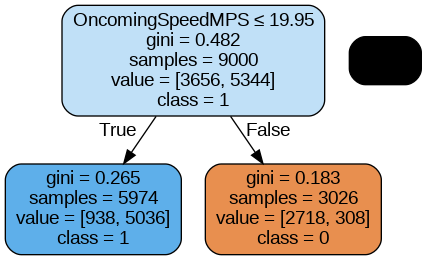

In [21]:
# CSV headings, excluding "Success". value_2 includes V4 debug headings.
value_1 = ['InitialSeparationM', 'OvertakingSpeedMPS', 'OncomingSpeedMPS']
'''
value_2 = ['InitialSeparationM', 'OvertakingSpeedMPS', 'OncomingSpeedMPS',
           'VehicleBeingOvertakenSpeedMPS', 'WindSpeedMPS',
           'FrictionCoefficient', 'RoadCondition']
'''

# Visualising a Decision Tree
# Trees as calculated earlier are a little on the big side

dot_data = StringIO()
export_graphviz(GR_D.best_estimator_, out_file= dot_data,
filled= True, rounded= True,
special_characters= True, feature_names= value_1, class_names= ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DoOvertake.png')
Image(graph.create_png())

Decision Tree Regressor Block

In [ ]:
# Decision Tree Regressor Code, combined block, might need later so not
# outright deleting.

'''
# Exclude 'InitialSeparationM' from feature columns for regression task
feature_cols = [x for x in data.columns if x != 'InitialSeparationM']

# Slice the data into new training and test sets for regression task
x_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'InitialSeparationM']
x_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'InitialSeparationM']

# Initialize and fit a DecisionTreeRegressor
dr = DecisionTreeRegressor().fit(x_train, y_train)
# Display the number of nodes and the maximum depth of the trained tree
dr.tree_.node_count, dr.tree_.max_depth

# Define a parameter grid for GridSearchCV for regression task
param_grid = { 'max_depth' : range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

# Initialize and fit a GridSearchCV with a DecisionTreeRegressor
GR_InitialSeperationM = GridSearchCV(DecisionTreeRegressor(random_state=42),
                        param_grid = param_grid,
                        scoring= 'neg_mean_squared_error',
                        n_jobs= -1)
GR_InitialSeperationM = GR.fit(x_train, y_train)
'''
print("Why are you running this cell?")

Hyper-Parameter Tuning

In [39]:
# ------------------------------------------------------------------------------
# V4, Revision 1:
param_grid_F = { 'max_depth' : range(1, dt_E.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt_E.feature_importances_)+1)}

GR_F = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid = param_grid_F,
                  scoring= 'accuracy',
                  n_jobs= -2)
GR_F = GR_F.fit(x_E_train, y_E_train)

In [40]:
# Display node count and max depth of best estimator
print("V4R1 Best Estimators:", GR_F.best_estimator_.tree_.node_count, GR_F.best_estimator_.tree_.max_depth)

V4R1 Best Estimators: 3 1


In [37]:
# V4, Revision 1:
train_test_gr_error_F = pd.concat([measure_error(y_E_train, y_E_train_pred_gr, 'train'),
                                   measure_error(y_E_test,  y_E_test_pred_gr, 'test')],
                                   axis= 1)
# ------------------------------------------------------------------------------
# Display the error metrics
print("V4R1:\t       Error Metrics")
print(train_test_gr_error_A)

V4R1:	       Error Metrics
              train      test
accuracy   0.661333  0.507000
precision  0.651371  0.510055
recall     0.706764  0.553571
f1         0.677937  0.530923
